# Part 1: Research Question & Variables
For the medical data set, my research question is the following: “Does high blood pressure contribute towards patient readmission?” The first thing we have to do is import the original CSV file that contains our data. To do this, we must first import the necessary packages.

In [2]:
# importing libraries
import pandas as pd
from pandas.api.types import CategoricalDtype
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency, chi2
from IPython.core.interactiveshell import InteractiveShell # importing to run multiple lines in one cell
InteractiveShell.ast_node_interactivity = "all" # Will allow for multiple lines in one cell

import warnings
warnings.filterwarnings('ignore')

# Cleaning Medical Data
Even though this data set is cleaned up, we must make sure to change certain datatypes (chr and str) as categoricals, check for null/na/unique values, and rename items 1-8 for data integrity and clear understanding.

Must evaluate the data types that exist: numeric (quantitative) - continuous (measured) and discrete (counted), categorical (qualitative) - nominal (unordered) and ordinal (ordered). 

In [3]:
medical_clean_data = pd.read_csv('medical_clean.csv') # no need for index [0]

medical_clean_data.info()

missing_values_sum = medical_clean_data.isna().sum()
print(f'Missing Values Check: {missing_values_sum}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [4]:
column_renames = {
     'Item1': 'Timely_Admission'
    ,'Item2': 'Timely_Treatment'
    ,'Item3': 'Timely_Visits'
    ,'Item4': 'Reliability'
    ,'Item5': 'Options'
    ,'Item6': 'Hours_Of_Treatment'
    ,'Item7': 'Courteous_Staff'
    ,'Item8': 'Listening' #Evidence of active listening from Doctor
}
medical_clean_data.rename(columns=column_renames, inplace=True)

medical_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

A dictionary was created to convert the 'chr' and 'str' data type columns below as categoricals. 

In [5]:
category_dtype = 'category'
convert_to_category = {
    'CaseOrder': category_dtype,
    'Customer_id': category_dtype,
    'Interaction': category_dtype,
    'UID': category_dtype,
    'Zip': category_dtype,
    'Lat': category_dtype,
    'Lng': category_dtype,
    'City': category_dtype,
    'State': category_dtype,
    'County': category_dtype,
    'Area': category_dtype,
    'TimeZone': category_dtype,
    'Job': category_dtype,
    'Marital': category_dtype,
    'Gender': category_dtype,
    'ReAdmis': category_dtype,
    'Soft_drink': category_dtype,
    'Initial_admin': category_dtype,
    'HighBlood': category_dtype,
    'Stroke': category_dtype,
    'Complication_risk': category_dtype,
    'Overweight': category_dtype,
    'Arthritis': category_dtype,
    'Diabetes': category_dtype,
    'Hyperlipidemia': category_dtype,
    'BackPain': category_dtype,
    'Anxiety': category_dtype,
    'Allergic_rhinitis': category_dtype,
    'Reflux_esophagitis': category_dtype,
    'Asthma': category_dtype,
    'Services': category_dtype,
    'Timely_Admission': category_dtype,
    'Timely_Treatment': category_dtype,
    'Timely_Visits': category_dtype,
    'Reliability': category_dtype,
    'Options': category_dtype,
    'Hours_Of_Treatment': category_dtype,
    'Courteous_Staff': category_dtype,
    'Listening': category_dtype,
}

medical_clean_data = medical_clean_data.astype(convert_to_category)
medical_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   CaseOrder           10000 non-null  category
 1   Customer_id         10000 non-null  category
 2   Interaction         10000 non-null  category
 3   UID                 10000 non-null  category
 4   City                10000 non-null  category
 5   State               10000 non-null  category
 6   County              10000 non-null  category
 7   Zip                 10000 non-null  category
 8   Lat                 10000 non-null  category
 9   Lng                 10000 non-null  category
 10  Population          10000 non-null  int64   
 11  Area                10000 non-null  category
 12  TimeZone            10000 non-null  category
 13  Job                 10000 non-null  category
 14  Children            10000 non-null  int64   
 15  Age                 10000 non-null  i

In [6]:
categorical_medical_data = medical_clean_data[convert_to_category.keys()]
high_cardinals = categorical_medical_data.nunique() > 3 #(> 3-5 Levels)
high_cardinals = high_cardinals[high_cardinals == True]
high_cardinals = list(high_cardinals.index.values)
print('Categoricals with high cardinality to be removed.')
print(high_cardinals)

medical_data_prepared = medical_clean_data.drop(high_cardinals, axis=1)
medical_data_prepared # Visually inspect dataframe to ensure data loaded as expected and do initial visual exploration

Categoricals with high cardinality to be removed.
['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'Zip', 'Lat', 'Lng', 'City', 'State', 'County', 'TimeZone', 'Job', 'Marital', 'Services', 'Timely_Admission', 'Timely_Treatment', 'Timely_Visits', 'Reliability', 'Options', 'Hours_Of_Treatment', 'Courteous_Staff', 'Listening']


,Population,Area,Children,Age,Income,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,...,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_days,TotalCharge,Additional_charges
0,2951,Suburban,1,53,86575.93,Male,No,19.141466,6,0,...,Yes,No,Yes,Yes,Yes,No,Yes,10.585770,3726.702860,17939.403420
1,11303,Urban,3,51,46805.99,Female,No,18.940352,4,2,...,No,No,No,No,No,Yes,No,15.129562,4193.190458,17612.998120
2,17125,Suburban,3,53,14370.14,Female,No,18.057507,4,1,...,Yes,No,No,No,No,No,No,4.772177,2434.234222,17505.192460
3,2162,Suburban,0,78,39741.49,Male,No,16.576858,4,1,...,No,No,No,No,No,Yes,Yes,1.714879,2127.830423,12993.437350
4,5287,Rural,1,22,1209.56,Female,No,17.439069,5,0,...,No,Yes,No,No,Yes,No,No,1.254807,2113.073274,3716.525786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4762,Urban,2,25,45967.61,Male,No,16.980860,4,2,...,No,No,No,Yes,No,Yes,No,51.561220,6850.942000,8927.642000
9996,1251,Urban,4,87,14983.02,Male,Yes,18.177020,5,0,...,Yes,No,No,No,No,No,Yes,68.668240,7741.690000,28507.150000
9997,532,Rural,3,45,65917.81,Female,Yes,17.129070,4,2,...,No,No,No,Yes,Yes,No,No,70.154180,8276.481000,15281.210000
9998,271,Rural,3,43,29702.32,Male,Yes,19.910430,5,2,...,No,No,Yes,No,No,No,No,63.356900,7644.483000,7781.678000


# Chi-Square Test
For our research question, the relevant variables are ReAdmis and HighBlood. We will now declare the variables that will be using.

Our first variable is ReAdmis - this variable is categorical with two levels (Yes/No).

Our second variable is HighBlood - this variable is categorical with two levels (Yes/No).

The chi-square test for independence was used because this looks for a significant difference between two categorical/qualitative variables. Chi-square is a non-parametric test (normal distribution free) because the data that it tests violate the assumptions of equal variance or homoscedasticity.  

Chi-square test for independence requires the following:

A. Simple random sampling

B. Categorical variables

C. Expected frequency count for each cell of the table is at least 5.

D. Degrees of freedom is equal to (r-1) * (c-1) where r is the number of levels for one categorical variable, and c is the number of levels for the other. 

E. Expected frequencies defined as Er,c = (Nr * Nc) / n

F. Test statistic is defined as X2 = Sum of [(Observedr,c - Expectedr,c)2/Expectedr,c]

The p-value represents the likelihood that the distribution of values observed would occur if the null hypothesis were correct. We can't be 100 percent sure that our pattern couldn't have emerged due to random chance but we can qualify the probability that random chance would produce a given pattern; this is the p-value. 

The smaller the p-value is, the less likely it is that the null hypothesis can account for our observations. When p falls below a critical value, which we call alpha, we reject the null hypothesis. 

Since the Chi-Square Statistic is lower than the Critical Value and the p-value isn't .05 (.83 was the output), we accept the null hypothesis. This means the association is statistically insignificant and the variables are independent. 

In [7]:
#Contingency Table
cross_tab = pd.crosstab(medical_data_prepared['HighBlood'] ,medical_data_prepared['ReAdmis'])
cross_tab

ReAdmis,No,Yes
HighBlood,,
No,3747,2163
Yes,2584,1506


In [8]:
#Chi-square test of independence of variables in a contingency table.
chi = stats.chi2_contingency(cross_tab)
print(chi)
print(f"The p-value, or probability under the null hypothesis of obtaining a result as extreme as the one observed, is {chi[1]:.3}.")

Chi2ContingencyResult(statistic=0.04239657973011679, pvalue=0.8368656684578771, dof=1, expected_freq=array([[3741.621, 2168.379],
       [2589.379, 1500.621]]))
The p-value, or probability under the null hypothesis of obtaining a result as extreme as the one observed, is 0.837.


In [9]:
critical_value = stats.chi2.ppf(1-.05, df=1) # .05 is the alpha level, 95% certainty
print(f'Critical Value = {critical_value}') # Chi square stat is lower than critical value

Critical Value = 3.841458820694124


# Univariate Analysis
We will perform univariate analysis on two variables, 2 continuous and 2 categorical

Continuous Variables - Income and initial_days

Categorical Variables - Gender and Area

We will use density plots to visualize the distribution.

Univariate means "one variable." A graph of a continuous variable like a histogram. A graph of a categorical variable like a bar graph. Provide a table of values below to improve understanding. 

When graphing a categorical and a continuous variable, watch out for meaning and understanding. State what the graph is saying to your readers so that they understand, too. 

The Income graph shows a right-skewed distribution. Initial days illustrates a bimodal distribution. 

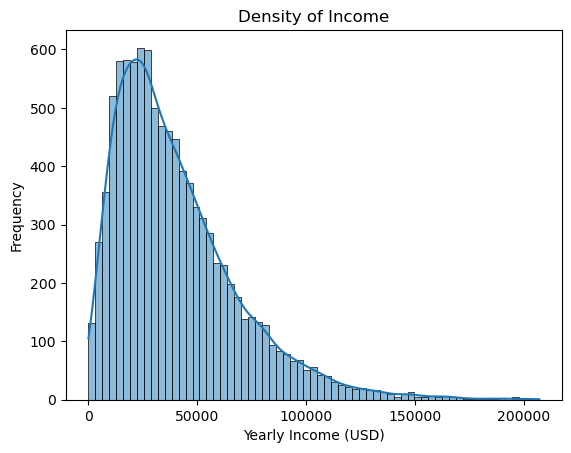

In [10]:
# Using Seaborn to plot histplot of Income
sns.histplot(data = medical_data_prepared['Income'], kde=True)
plt.title('Density of Income')
plt.xlabel('Yearly Income (USD)')
plt.ylabel('Frequency');

<Axes: >

Text(0.5, 1.0, 'Income Outliers')

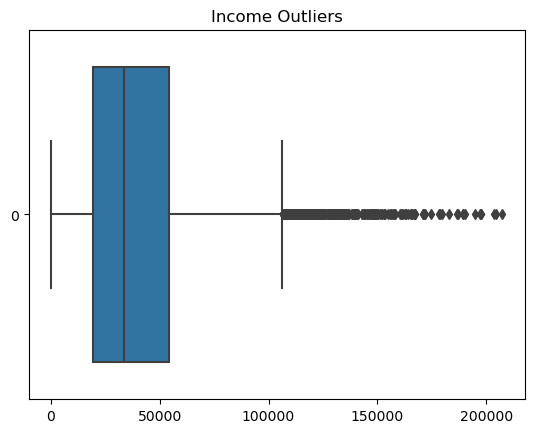

In [11]:
sns.boxplot(data=medical_data_prepared['Income'], orient='h')
plt.title('Income Outliers')
plt.show()

In [12]:
medical_data_prepared['Income'].describe()

count     10000.000000
mean      40490.495160
std       28521.153293
min         154.080000
25%       19598.775000
50%       33768.420000
75%       54296.402500
max      207249.100000
Name: Income, dtype: float64

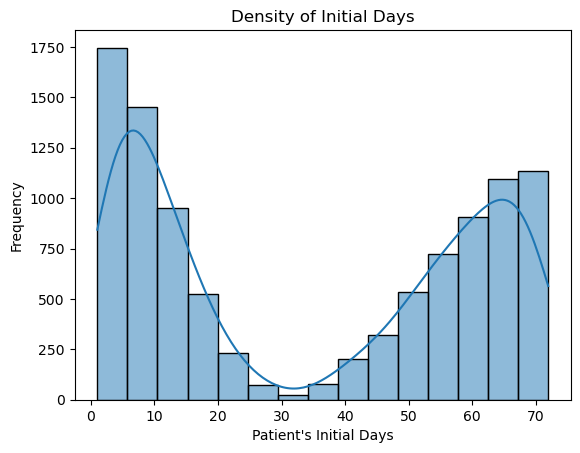

In [13]:
# Using Seaborn to plot histplot of Initial Days spent in hospital
sns.histplot(data = medical_data_prepared['Initial_days'], kde=True)
plt.title('Density of Initial Days')
plt.xlabel("Patient's Initial Days")
plt.ylabel('Frequency');

<Axes: >

Text(0.5, 1.0, 'Initial Days Outliers')

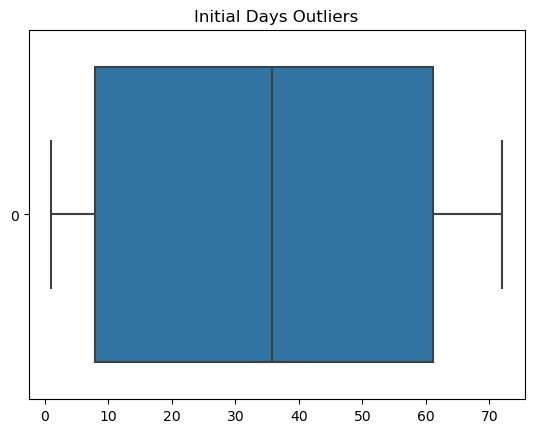

In [14]:
sns.boxplot(data=medical_data_prepared['Initial_days'], orient='h')
plt.title('Initial Days Outliers')
plt.show()

In [15]:
medical_data_prepared['Initial_days'].describe()

count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64

In [16]:
# Output of gender value counts
medical_data_prepared['Gender'].value_counts()

Gender
Female       5018
Male         4768
Nonbinary     214
Name: count, dtype: int64

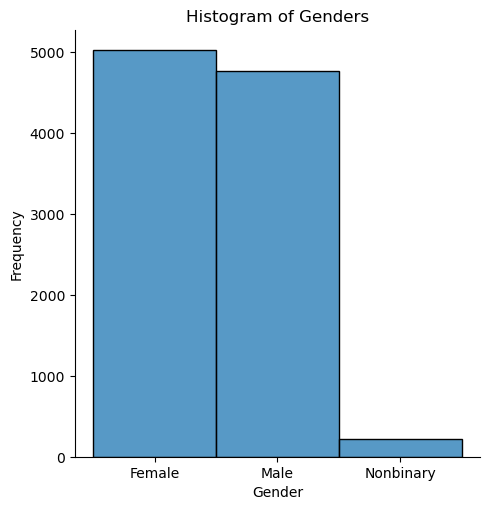

In [17]:
# Using Seaborn to plot bar graph of Gender
sns.displot(medical_data_prepared['Gender'], kind='hist')
plt.title('Histogram of Genders')
plt.xlabel('Gender')
plt.ylabel('Frequency');

In [18]:
# Output of area value counts
medical_data_prepared['Area'].value_counts()

Area
Rural       3369
Suburban    3328
Urban       3303
Name: count, dtype: int64

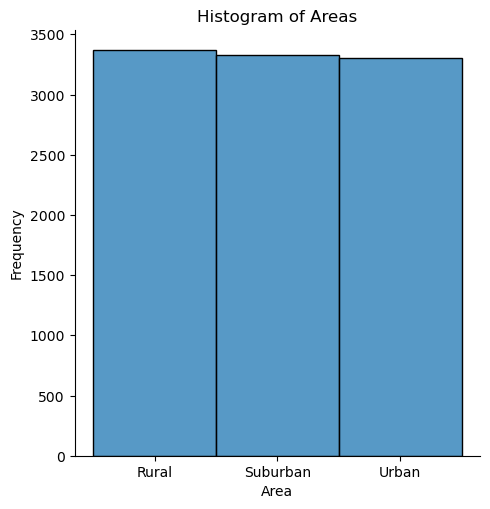

In [19]:
# Using Seaborn to plot histogram of Area
sns.displot(medical_data_prepared['Area'], kind='hist')
plt.title('Histogram of Areas')
plt.xlabel('Area')
plt.ylabel('Frequency');

# Bivariate Analysis
We will perform bivariate analysis on two continuous variables - Income and Initial Days. Bivariate graphs use same datatype: continuous vs. continuous, categorical vs. categorical. 

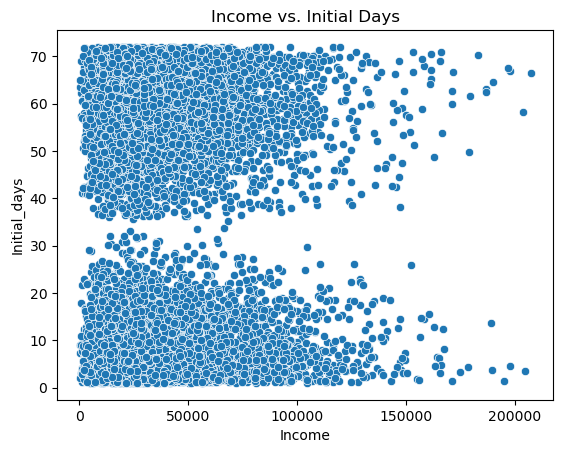

In [23]:
# Using Seaborn scatterplot for continuous variables
sns.scatterplot(data=medical_data_prepared, x='Income', y='Initial_days')
plt.title('Income vs. Initial Days')
plt.xlabel('Income')
plt.ylabel('Initial_days');

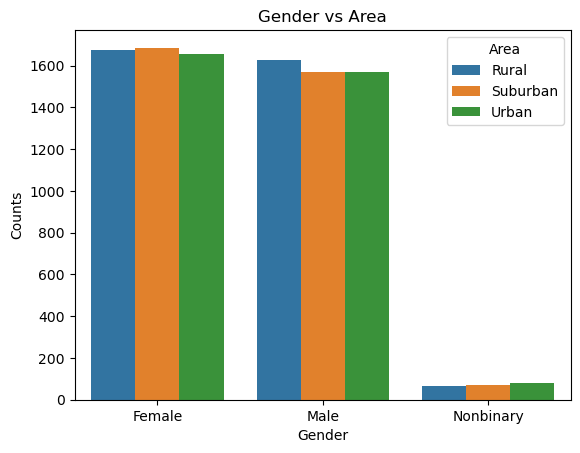

In [21]:
# Plotting Gender vs Area 
sns.countplot(data=medical_data_prepared, x='Gender', hue='Area')
plt.title('Gender vs Area')
plt.xlabel('Gender')
plt.ylabel('Counts');